# Setting Up

In [447]:
%pip install django djlint numpy pandas matplotlib==3.7.3 seaborn jupyter nltk spacy scikit-learn imblearn joblib nlppreprocess contractions
%python -m spacy download en_core_web_sm

UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).
You should consider upgrading via the 'c:\Training\Project\django-ml-proj-nlp\senti-env\Scripts\python.exe -m pip install --upgrade pip' command.


In [448]:
import pandas as pd
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import spacy
import contractions
from nlppreprocess import NLP

from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import NearMiss

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, balanced_accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [449]:
# Read txt
df2016_train = pd.read_csv('datasets/twitter-2016train-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])
df2016_devtest = pd.read_csv('datasets/twitter-2016devtest-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])
df2016_dev = pd.read_csv('datasets/twitter-2016dev-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])
df2016_test = pd.read_csv('datasets/twitter-2013test-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])

df2015_train = pd.read_csv('datasets/twitter-2015train-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])
df2015_test = pd.read_csv('datasets/twitter-2015test-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])

df2014_sarcasm = pd.read_csv('datasets/twitter-2014sarcasm-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])
df2014_test = pd.read_csv('datasets/twitter-2014test-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])

df2013_train = pd.read_csv('datasets/twitter-2013train-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])
df2013_dev = pd.read_csv('datasets/twitter-2013dev-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])
df2013_test = pd.read_csv('datasets/twitter-2013test-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])

# Decode unicode characters (if any)
df2016_train['text'] = df2016_train['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
#df2016_devtest['text'] = df2016_devtest['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
df2016_dev['text'] = df2016_dev['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
df2016_test['text'] = df2016_test['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))

df2015_train['text'] = df2015_train['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
df2015_test['text'] = df2015_test['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))

df2014_sarcasm['text'] = df2014_sarcasm['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
df2014_test['text'] = df2014_test['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))

df2013_train['text'] = df2013_train['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
df2013_dev['text'] = df2013_dev['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
df2013_test['text'] = df2013_test['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))

# Concat
#df = pd.concat([df2016_train, df2016_dev, df2016_test, df2016_devtest, df2015_train, df2015_test, df2014_sarcasm, df2014_test, df2013_train, df2013_dev, df2013_test], ignore_index=True, axis=0)
#df = pd.concat([df2016_train, df2016_dev, df2016_test, df2016_devtest, df2015_train, df2015_test, df2014_test, df2013_train, df2013_dev, df2013_test], ignore_index=True, axis=0)
#df = pd.concat([df2016_train, df2016_dev, df2015_train, df2013_train, df2013_dev], ignore_index=True, axis=0)
df = pd.concat([df2016_train, df2015_train, df2013_train], ignore_index=True, axis=0)

# Drop id column
df.drop(columns=['id'], inplace=True)

df

C:\Users\Admin\AppData\Local\Temp\ipykernel_19932\3840874528.py:18: DeprecationWarning: invalid escape sequence '\m'
  df2016_train['text'] = df2016_train['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
C:\Users\Admin\AppData\Local\Temp\ipykernel_19932\3840874528.py:21: DeprecationWarning: invalid escape sequence '\ '
  df2016_test['text'] = df2016_test['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
C:\Users\Admin\AppData\Local\Temp\ipykernel_19932\3840874528.py:21: DeprecationWarning: invalid escape sequence '\i'
  df2016_test['text'] = df2016_test['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
C:\Users\Admin\AppData\Local\Temp\ipykernel_19932\3840874528.py:21: DeprecationWarning: invalid escape sequence '\('
  df2016_test['text'] = df2016_test['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
C:\Users\Admin\AppData\Local\Temp\ipykernel_19932\3840874528.py:21: DeprecationWarning: invalid escape sequence '\

,sentiment,text
0,negative,dear @Microsoft the newOoffice for Mac is grea...
1,negative,@Microsoft how about you make a system that do...
2,negative,I may be ignorant on this issue but... should ...
3,negative,"Thanks to @microsoft, I just may be switching ..."
4,neutral,If I make a game as a #windows10 Universal App...
...,...,...
16036,positive,RT @MNFootNg It's monday and Monday Night Foot...
16037,positive,All I know is the road for that Lomardi start ...
16038,neutral,"All Blue and White fam, we r meeting at Golden..."
16039,positive,@DariusButler28 Have a great game agaist Tam...


# Preprocessing

In [450]:
# show value_counts for targets for entire dataset
df['sentiment'].value_counts()

sentiment
neutral     6840
positive    6827
negative    2374
Name: count, dtype: int64

In [451]:
# get negatives and add to dataset
df2016_devtest_neg = df2016_devtest[df2016_devtest['sentiment'] == 'negative']
df2016_dev_neg = df2016_dev[df2016_dev['sentiment'] == 'negative']
df2016_test_neg = df2016_test[df2016_test['sentiment'] == 'negative']
df2015_test_neg = df2015_test[df2015_test['sentiment'] == 'negative']
df2014_test_neg = df2014_test[df2014_test['sentiment'] == 'negative']
df2013_test_neg = df2013_test[df2013_test['sentiment'] == 'negative']
df2013_dev_neg = df2013_dev[df2013_dev['sentiment'] == 'negative']

df_neg = pd.concat([df2016_devtest_neg, df2016_dev_neg, df2016_test_neg, df2015_test_neg, df2014_test_neg, df2013_test_neg, df2013_dev_neg], ignore_index=True, axis=0)
df_neg.drop(columns=['id'], inplace=True)
df = pd.concat([df, df_neg], ignore_index=True, axis=0)

df.tail()

,sentiment,text
18777,negative,Gossip Girl was pulled on Monday because of Hu...
18778,negative,I kicked off Type 1 Diabetes Awareness Day wit...
18779,negative,It’s been in the 50-60s all week. This weekend...
18780,negative,Can’t even sleep.. All I can think about is ho...
18781,negative,Just don’t understand TOB thought he would com...


In [452]:
# show value_counts for targets for entire dataset again
df['sentiment'].value_counts()

sentiment
neutral     6840
positive    6827
negative    5115
Name: count, dtype: int64

In [453]:
# show value_counts for targets for duplicate rows
duplicates = df[df.duplicated()]
duplicates['sentiment'].value_counts()

sentiment
negative    636
neutral     277
positive    186
Name: count, dtype: int64

In [454]:
# drop duplicates
print("Num of duplicates before drop: ", df.duplicated().sum())
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)
print("Num of duplicates after drop: ", df.duplicated().sum())
print("Rows after drop: ", df.shape[0], "\n")
print(df['sentiment'].value_counts())

Num of duplicates before drop:  1099
Num of duplicates after drop:  0
Rows after drop:  17683 

sentiment
positive    6641
neutral     6563
negative    4479
Name: count, dtype: int64


In [455]:
# using nltk (time 0.4s)
nlp = NLP(
    replace_words=True,             # replaces contractions
    remove_stopwords=True,          # removes select stopwords
    remove_numbers=False,
    lemmatize=True,                 # for lemmatization
    lemmatize_method='wordnet'
)

def preprocess_text(text):
    to_lower = text.lower() # make text lowercase
    no_link = re.sub('http[^\s]+', '', to_lower) # remove links (starts with http)
    no_contractions = contractions.fix(no_link) # remove contractions by expanding them
    no_punctuations = re.sub('\W+', ' ', no_contractions) # remove punctuations
    no_num = re.sub(r'\b\d+\b', ' ', no_punctuations) # remove numbers unless connected to words
    no_time = re.sub(r'\b([a-zA-Z0-9]+)(?:am|pm)\b', '', no_num) # remove time (e.g. 10pm)
    no_space = re.sub('\s+', ' ', no_time) # remove extra spaces
    after_nlp = nlp.process(no_space) # remove stopwords and lemmatize for NLP

    return after_nlp

In [456]:
# using spacy (time 2m 33.3s)
spcy = spacy.load('en_core_web_sm') # load spacy
nlp = NLP(
    replace_words=True,             # replaces contractions
    remove_stopwords=True,          # removes select stopwords
    remove_numbers=False,
    lemmatize=True,                 # for lemmatization
    lemmatize_method='wordnet'
)

def preprocess_text(text):
    to_lower = text.lower() # make text lowercase
    no_link = re.sub('http[^\s]+', '', to_lower) # remove links (starts with http)
    no_contractions = contractions.fix(no_link) # remove contractions by expanding them
    doc = spcy(no_contractions) # tokenize

    # remove punctuation, numbers, and time-related words
    processed_tokens = [
        token.text for token in doc 
        if not token.is_punct and (
            token.is_alpha or token.text.endswith(("st", "nd", "rd", "th"))
        )
    ]
    preprocessed_text = " ".join(processed_tokens) # join the processed tokens to form the preprocessed text

    after_nlp = nlp.process(preprocessed_text) # remove stopwords and lemmatize using NLP

    return after_nlp

In [457]:
# apply function and store result in new column
df["processed"] = df["text"].apply(preprocess_text)

In [458]:
# view original text
df['text'][17680]

'It’s been in the 50-60s all week. This weekend its gone be back in the 70s then on Monday its droppin back down to the 50s. fuck ATL weather'

In [459]:
# view preprocessed text
df['processed'][17680]

'been in week weekend it gone back in then monday it droppin back fuck atl weather'

In [460]:
# split df to features and targets
df_features = df["processed"]
df_target = df["sentiment"]

In [461]:
# view features
df_features.tail()

17678    gossip girl pulled monday because hurricane sa...
17679    kicked off type diabetes awareness day with hi...
17680    been in week weekend it gone back in then mond...
17681    can not even sleep can think about how fucked ...
17682    just not understand tob thought would come out...
Name: processed, dtype: object

In [462]:
# view target
df_target.head()

0    negative
1    negative
2    negative
3    negative
4     neutral
Name: sentiment, dtype: object

# Basic Model

In [520]:
# split df to train and test
x_train, x_test, y_train, y_test = train_test_split(
    df_features, df_target, test_size=0.2, random_state=77
)

print(x_train.shape, x_test.shape)

(14146,) (3537,)


In [521]:
# vectorize the preprocessed text
vectorizer = TfidfVectorizer(   # TFIDF = checks how important a word is
    #max_features=2000,          # max_features = maximum number of preserved words
    min_df=12,                  # min_df = minimum times a word should appear to be saved, if not met do not keep
    max_df=0.5,                 # max_df = maximum times a word can appear to be saved, if exceeds do not keep, float for percentage
    #sublinear_tf=True           # sublinear_tf = used to help scale down the importance of terms that occur frequently
) 

x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

vector_df = pd.DataFrame(x_train.toarray(), columns=vectorizer.get_feature_names_out())

vector_df.head()

,10th,11th,12th,13th,14th,15th,16th,17th,18th,19th,...,young,your,yours,yourself,youtube,yr,yushin,zimmerman,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [522]:
# view balance of train set targets
print("Percentage:\n", y_train.value_counts().divide(y_train.shape[0], axis=0).multiply(100, axis=0).round(2))
print("\nCounts:\n", y_train.value_counts())
print("\nRows:", y_train.shape[0])

Percentage:
 sentiment
positive    37.83
neutral     36.87
negative    25.31
Name: count, dtype: float64

Counts:
 sentiment
positive    5351
neutral     5215
negative    3580
Name: count, dtype: int64

Rows: 14146


In [523]:
# undersampling
undersample = NearMiss(n_neighbors=5, version=3, sampling_strategy="not minority")

x_train, y_train = undersample.fit_resample(x_train, y_train)

print(y_train.value_counts())
print("\nRows:", y_train.shape[0])

c:\Training\Project\django-ml-proj-nlp\senti-env\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


sentiment
negative    3580
positive    3580
neutral     3559
Name: count, dtype: int64

Rows: 10719


In [524]:
# train model

model = SVC(random_state=77)   
# Time: 20.7s
# Accuracy: 0.6402887374696773
# Precision: 0.6407122104715844
# Recall: 0.6402887374696773
# F1 Score: 0.6387431324799374

# fit the model
model.fit(x_train, y_train)

# predict
predictions = model.predict(x_test)

# check metric scores
print("Accuracy:", balanced_accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions, average="macro"))
print("Recall:", recall_score(y_test, predictions, average="macro"))
print("F1 Score:", f1_score(y_test, predictions, average="macro"))

Accuracy: 0.6402887374696773
Precision: 0.6407122104715844
Recall: 0.6402887374696773
F1 Score: 0.6387431324799374


In [19]:
# other models tested

# create arrays for NB
#x_train_arr = x_train.toarray()
#x_test_arr = x_test.toarray()

#model = GaussianNB()
# Time: 1.4s
# Accuracy: 0.520398455884649
# Precision: 0.5052635960277055
# Recall: 0.520398455884649
# F1 Score: 0.4904032195135731

#model = MultinomialNB()
# Time: 0.2s
# Accuracy: 0.6157874810119358
# Precision: 0.6058093470479066
# Recall: 0.6157874810119358
# F1 Score: 0.6084338406999361

#model = ComplementNB()
# Time: 0.2s
# Accuracy: 0.6138711696239828
# Precision: 0.6002568821057218
# Recall: 0.6138711696239828
# F1 Score: 0.6010822036557764

#model = LinearSVC(random_state=77, dual='auto')
# Time: 0.2s
# Accuracy: 0.6179522766192419
# Precision: 0.6120904794753274
# Recall: 0.6179522766192419
# F1 Score: 0.6143261778044388

#model = SGDClassifier(random_state=77)
# Time: 0.2s
# Accuracy: 0.6356390954043296
# Precision: 0.6271946912645893
# Recall: 0.6356390954043296
# F1 Score: 0.6296765508794562

#model = DecisionTreeClassifier(random_state=77)
# Time: 6.5s
# Accuracy: 0.526596990408624
# Precision: 0.520354781618298
# Recall: 0.526596990408624
# F1 Score: 0.5207425972469898

#model = RandomForestClassifier(random_state=77)
# Time: 27.1s
# Accuracy: 0.610193212633456
# Precision: 0.6073167103118654
# Recall: 0.610193212633456
# F1 Score: 0.6045639655836464

#model = LogisticRegression(random_state=77, max_iter=x_train.shape[0])
# Time: 0.5s
# Accuracy: 0.6261574692250776
# Precision: 0.621260497614312
# Recall: 0.6261574692250776
# F1 Score: 0.6228231009151246


In [525]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

    negative       0.62      0.66      0.64       899
     neutral       0.60      0.65      0.63      1348
    positive       0.70      0.61      0.65      1290

    accuracy                           0.64      3537
   macro avg       0.64      0.64      0.64      3537
weighted avg       0.64      0.64      0.64      3537



In [526]:
# generate confusion matrix
labels = np.unique(predictions)
cm = confusion_matrix(y_test, predictions, labels=labels)
cm

array([[597, 212,  90],
       [229, 877, 242],
       [139, 369, 782]], dtype=int64)

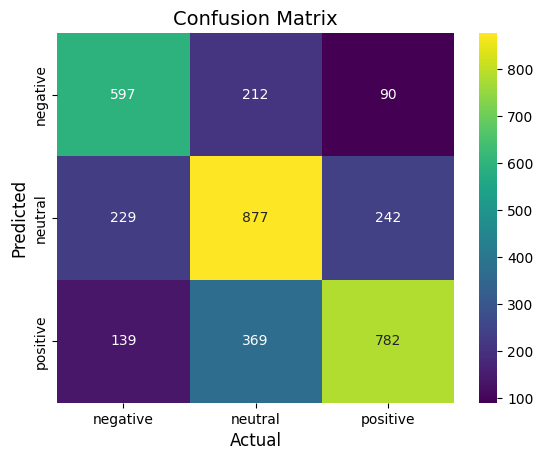

In [527]:
# show confusion matrix in a heatmap
sns.heatmap(cm,
            annot=True,
            fmt='d',
            xticklabels=labels,
            yticklabels=labels,
            cmap='viridis')

plt.ylabel('Predicted', fontsize=12)
plt.xlabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [528]:
# view balance of test set targets
print(y_test.value_counts())
print("\nRows:", y_test.shape[0])

sentiment
neutral     1348
positive    1290
negative     899
Name: count, dtype: int64

Rows: 3537


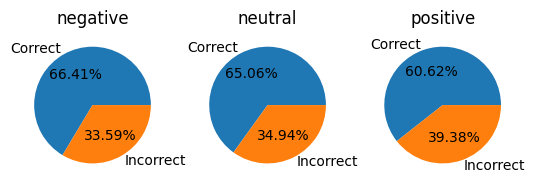

In [529]:
# calculate percentage of correctly identified sentiments per sentiment
percent_correct = [np.sum(cm[i, i]) / np.sum(cm[i, :]) for i in range(len(cm))]
percent_incorrect = [1 - percent_correct[i] for i in range(len(cm))]

# show percentages in pie charts
fig, axs = plt.subplots(1, len(cm))
for i in range(len(cm)):
    axs[i].pie([percent_correct[i], percent_incorrect[i]], labels=["Correct", "Incorrect"], autopct="%1.2f%%")
    axs[i].set_title(labels[i])
plt.show()

# Hyperparameter Tuning

In [131]:
# GridSearchCV

# provide parameter dictionary
parameters = {
    "C": [1, 2, 3, 4, 5],                               # regularization parameter, higher = more sensitive to misclassifications
    "kernel": ["linear", "rbf", "poly", "sigmoid"],     # kernel type
    "gamma": ["scale", 0.1, 1.0, 1.5],                  # kernel coefficient, only important if rbf/poly/sigmoid, higher = more sensitive to local variations in the data
    "degree": [3, 4, 5],                                # only important if poly
    "coef0": [0, 0.5, 1],                               # only important if poly/sigmoid
    "decision_function_shape": ["ovo", "ovr"],          # one-vs-one or one-vs-rest
    "break_ties": [True, False],                        # only important if ovr
}

# create blank model
model_tuner = SVC(random_state=77)

# perform grid search on f1_macro metric
model_tuner = GridSearchCV(
    model_tuner,
    parameters,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

# fit the model
tune_results = model_tuner.fit(x_train, y_train)

# get the best hyperparameters
print("Best Params: ", tune_results.best_params_)

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits


c:\Training\Project\django-ml-proj-nlp\senti-env\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.54894239 0.51674612 0.5222686 ]
  warnings.warn(


Best Params:  {'C': 1, 'break_ties': True, 'coef0': 1, 'decision_function_shape': 'ovr', 'degree': 4, 'gamma': 0.1, 'kernel': 'poly'}


In [26]:
# Time: 134m 13.4s
# Best Params:  {'C': 1, 'coef0': 0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}

# Parameter Grid: 
#    "C": [1, 5, 10],                                    # regularization parameter, higher = more sensitive to misclassifications
#    "kernel": ["linear", "rbf", "poly", "sigmoid"],     # kernel type
#    "gamma": ["scale", "auto", 0.0, 0.5],               # kernel coefficient, only important if rbf/poly/sigmoid, higher = more sensitive to local variations in the data
#    "degree": [3, 4, 5],                                # only important if poly
#    "coef0": [0, 0.5, 1],                               # only important if poly/sigmoid
#    "decision_function_shape": ["ovo", "ovr"]           # one-vs-one or one-vs-rest

In [ ]:
# Time: 377m 59.4s
# Best Params: Best Params:  {'C': 1, 'break_ties': True, 'coef0': 1, 'decision_function_shape': 'ovr', 'degree': 4, 'gamma': 0.1, 'kernel': 'poly'}

# Parameter Grid:
#    "C": [1, 2, 3, 4, 5],                               # regularization parameter, higher = more sensitive to misclassifications
#    "kernel": ["linear", "rbf", "poly", "sigmoid"],     # kernel type
#    "gamma": ["scale", 0.1, 1.0, 1.5],                  # kernel coefficient, only important if rbf/poly/sigmoid, higher = more sensitive to local variations in the data
#    "degree": [3, 4, 5],                                # only important if poly
#    "coef0": [0, 0.5, 1],                               # only important if poly/sigmoid
#    "decision_function_shape": ["ovo", "ovr"],          # one-vs-one or one-vs-rest
#    "break_ties": [True, False],                        # only important if ovr

In [130]:
# RandomizedSearchCV

# provide parameter dictionary
parameters = {
    "C": np.arange(1, 11, 1),                           # (10) regularization parameter, higher = more sensitive to misclassifications
    "kernel": ["linear", "rbf", "poly", "sigmoid"],     # kernel type
    "gamma": np.arange(0.1, 1.1, 0.1),                  # (10) kernel coefficient, only important if rbf/poly/sigmoid, higher = more sensitive to local variations in the data
    "degree": np.arange(3, 8, 1),                       # (5) only important if poly
    "coef0": np.linspace(0, 1, num=5),                  # (5) only important if poly/sigmoid
    "decision_function_shape": ["ovo", "ovr"],          # one-vs-one or one-vs-rest
    "break_ties": [True, False],                        # only important if ovr
}

# create blank model
model_tuner = SVC(random_state=77)

# perform grid search on f1_macro metric
model_tuner = RandomizedSearchCV(
    model_tuner,
    parameters,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1,
    n_iter=1000,
    random_state=77
)

# fit the model
tune_results = model_tuner.fit(x_train, y_train)

# get the best hyperparameters
print("Best Params: ", tune_results.best_params_)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


c:\Training\Project\django-ml-proj-nlp\senti-env\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [       nan 0.53344196 0.54251765 0.54434053 0.50745556        nan
        nan        nan 0.54625546        nan        nan 0.55232941
 0.54218155 0.52719049        nan 0.52651773 0.54916273        nan
 0.53352713 0.54294054 0.16659673 0.26564802 0.54284658        nan
 0.54404425 0.54012568 0.52918128 0.54565678 0.54422104 0.54401596
 0.16659673 0.50745556 0.54517865        nan        nan 0.53620069
        nan        nan 0.5062039  0.54460447 0.52365723 0.50745556
 0.53568974 0.55351534 0.51495454 0.55313875 0.5522039  0.52928141
 0.54457361 0.53566041 0.5479103  0.5543659  0.54073217 0.54460447
        nan 0.54265688 0.16659673 0.55222763        nan 0.52619901
 0.54754941        nan 0.55174864 0.53988029        nan        nan
 0.53057423 0.48462672 0.5179681  0.53742937        nan 0.54200257
        nan 0.55089035 0.5142

Best Params:  {'kernel': 'rbf', 'gamma': 0.4, 'degree': 4, 'decision_function_shape': 'ovr', 'coef0': 0.5, 'break_ties': True, 'C': 1}


In [ ]:
# Time: 158m 5.8s
# Best Params:  {'kernel': 'rbf', 'gamma': 0.4, 'degree': 4, 'decision_function_shape': 'ovr', 'coef0': 0.5, 'break_ties': True, 'C': 1}

# Parameter Grid:
#    "C": np.arange(1, 11, 1),                           # (10) regularization parameter, higher = more sensitive to misclassifications
#    "kernel": ["linear", "rbf", "poly", "sigmoid"],     # kernel type
#    "gamma": np.arange(0.1, 1.1, 0.1),                  # (10) kernel coefficient, only important if rbf/poly/sigmoid, higher = more sensitive to local variations in the data
#    "degree": np.arange(3, 8, 1),                       # (5) only important if poly
#    "coef0": np.linspace(0, 1, num=5),                  # (5) only important if poly/sigmoid
#    "decision_function_shape": ["ovo", "ovr"],          # one-vs-one or one-vs-rest
#    "break_ties": [True, False],                        # only important if ovr

In [530]:
# create new model with best hyperparameters
tuned_model = SVC(random_state=77, probability=True,
    C=1, decision_function_shape='ovo', gamma=1.0, kernel='rbf'
)

# fit the tuned model
tuned_model.fit(x_train, y_train)

# predict
predictions = tuned_model.predict(x_test)

# check metric scores
print("Accuracy:", balanced_accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions, average="macro"))
print("Recall:", recall_score(y_test, predictions, average="macro"))
print("F1 Score:", f1_score(y_test, predictions, average="macro"))

Accuracy: 0.6411540796621783
Precision: 0.6415841575246608
Recall: 0.6411540796621783
F1 Score: 0.6395674469575722


In [40]:
# SCORE TO BEAT:
# Accuracy: 0.6402887374696773
# Precision: 0.6407122104715844
# Recall: 0.6402887374696773
# F1 Score: 0.6387431324799374

# RESULTING SCORE:
# Params: C=1, decision_function_shape='ovo', gamma=1.0, kernel='rbf'
# Time: 1m 28.5s
# Accuracy: 0.6411540796621783
# Precision: 0.6415841575246608
# Recall: 0.6411540796621783
# F1 Score: 0.6395674469575722

In [ ]:
# other results

# [Higher]
# Params: C=1, decision_function_shape='ovr', gamma=1.0, kernel='rbf', break_ties=True
# Time: 20.3s
# Accuracy: 0.6408058083964016
# Precision: 0.6418664262938404
# Recall: 0.6408058083964016
# F1 Score: 0.6396517717782468

# [Lower]
# Params: C=1, decision_function_shape='ovr', gamma=0.4, kernel='rbf', break_ties=True
# Time: 21.1s
# Accuracy: 0.6382130155991367
# Precision: 0.6423001868571392
# Recall: 0.6382130155991367
# F1 Score: 0.6374188850856412

# [Lower]
# Params: C=1, decision_function_shape='ovr', gamma=0.1, kernel='poly', break_ties=True, coef0=1, degree=4
# Time: 
# Accuracy: 0.6306163506666769
# Precision: 0.6342607239068521
# Recall: 0.6306163506666769
# F1 Score: 0.6299178559203749

In [531]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

    negative       0.62      0.67      0.64       899
     neutral       0.60      0.65      0.63      1348
    positive       0.70      0.61      0.65      1290

    accuracy                           0.64      3537
   macro avg       0.64      0.64      0.64      3537
weighted avg       0.64      0.64      0.64      3537



In [532]:
# generate confusion matrix
labels = np.unique(predictions)
cm = confusion_matrix(y_test, predictions, labels=labels)
cm

array([[598, 211,  90],
       [229, 879, 240],
       [139, 369, 782]], dtype=int64)

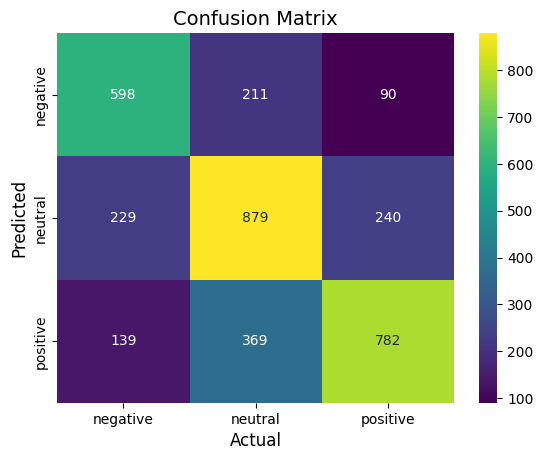

In [533]:
# show confusion matrix in a heatmap
sns.heatmap(cm,
            annot=True,
            fmt='d',
            xticklabels=labels,
            yticklabels=labels,
            cmap='viridis')

plt.ylabel('Predicted', fontsize=12)
plt.xlabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

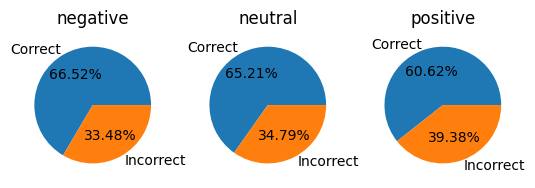

In [534]:
# calculate percentage of correctly identified sentiments per sentiment
percent_correct = [np.sum(cm[i, i]) / np.sum(cm[i, :]) for i in range(len(cm))]
percent_incorrect = [1 - percent_correct[i] for i in range(len(cm))]

# show percentages in pie charts
fig, axs = plt.subplots(1, len(cm))
for i in range(len(cm)):
    axs[i].pie([percent_correct[i], percent_incorrect[i]], labels=["Correct", "Incorrect"], autopct="%1.2f%%")
    axs[i].set_title(labels[i])
plt.show()